# Image Classification

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
cardio = pd.read_csv("/Users/skareti/Desktop/cardio.csv")
cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [23]:
cardio.shape

(70000, 13)

In [25]:
#get count of empty values
cardio.isna().sum()

TypeError: 'numpy.ndarray' object is not callable

In [26]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#number of patients with cardiovascular disease and without
cardio['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/Users/skareti/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

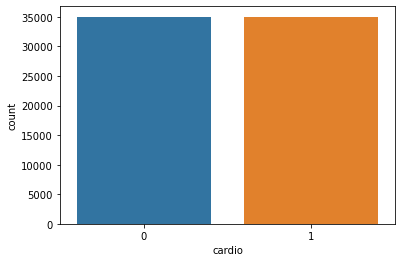

In [29]:
#visualize patients with and without heart disease
sns.countplot(cardio['cardio'])

<AxesSubplot:xlabel='years', ylabel='count'>

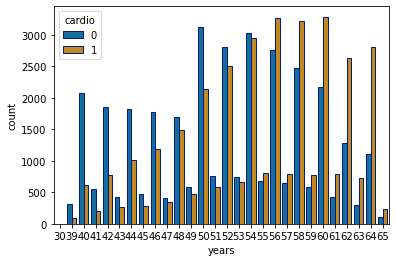

In [36]:
#look at the number of people with cardiovascular disease that exceed number of people w/o cardiovascular disease

#years column
cardio['years'] = (cardio['age']/365).round(0)
cardio['years'] = pd.to_numeric(cardio['years'], downcast = 'integer')


#visualize
sns.countplot(x = 'years', hue = 'cardio', data = cardio, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1))

<AxesSubplot:>

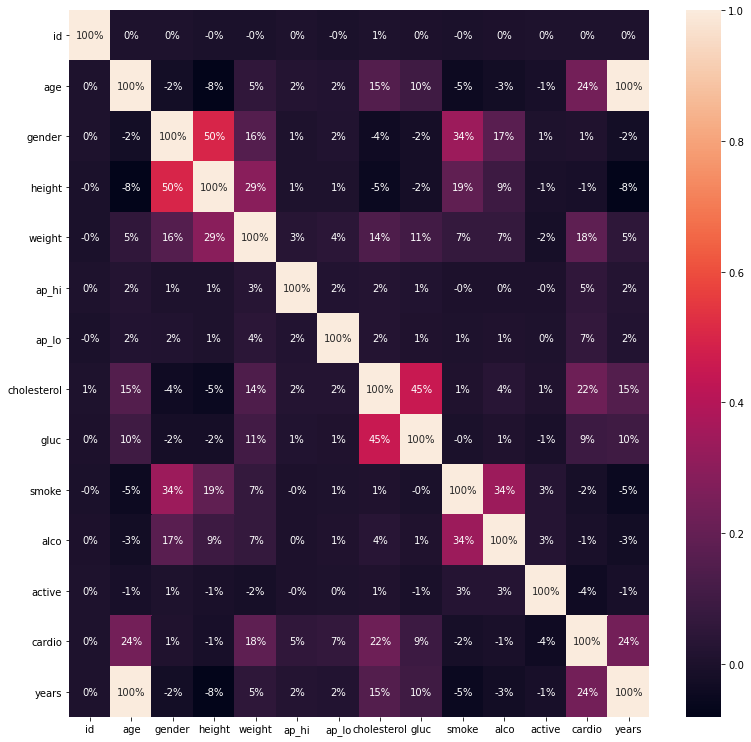

In [39]:
#heatmap
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
sns.heatmap(cardio.corr(), annot = True, fmt= '.0%')

In [42]:
cardio = cardio.drop('years', axis = 1)

KeyError: "['years'] not found in axis"

In [43]:
cardio = cardio.drop('id', axis = 1)

In [46]:
#split data into feature and target
X = cardio.iloc[:, :-1].values
Y = cardio.iloc[:,-1].values

In [48]:
#split data again, 75% training set and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [50]:
#feature scaling between 0 and 1, inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
#Use RF Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [53]:
#Test the models accuracy on training data
model = forest
model.score(X_train, Y_train)

0.979904761904762

In [55]:
#Test the models accuracy on the test data set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, model.predict(X_test))

#find true/false positive/negatives
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)

print('Model Test Accuracy = {}'.format( (TP+TN)/(TP+TN+FN+FP)))



[[6487 2122]
 [3093 5798]]
Model Test Accuracy = 0.702
